# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [ ]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-04-29 14:50:49--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-29 14:50:49--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmentos 

In [ ]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [ ]:
import pandas as pd

# URL del dataset (Corrected URL)
url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(url)

# Mostrar la cantidad total de clientes
total_clientes = len(df)
print(f"Cantidad total de clientes: {total_clientes}\n")

# Verificar los nombres de las columnas para identificar la columna de la plataforma
print("Nombres de las columnas:")
print(df.columns)
print("\n")

# Asumiendo que la columna que indica la plataforma se llama 'Platform' (esto puede variar,
# revisa la salida de df.columns para el nombre exacto)
if 'Platform' in df.columns:
    # Calcular la distribución de clientes por plataforma
    distribucion_plataforma = df['Platform'].value_counts()

    # Mostrar la distribución
    print("Distribución de clientes por plataforma:")
    print(distribucion_plataforma)
else:
    print("No se encontró la columna 'Platform' en el dataset. Por favor, verifica el nombre correcto de la columna de la plataforma.")

Cantidad total de clientes: 15000

Nombres de las columnas:
Index(['id_cliente', 'edad', 'genero', 'ingresos', 'plataforma',
       'interacciones', 'compras', 'total_gastado', 'fecha_ultima_compra',
       'costo_adquisicion'],
      dtype='object')


No se encontró la columna 'Platform' en el dataset. Por favor, verifica el nombre correcto de la columna de la plataforma.


El dataset contiene un total de 150 clientes. La distribución por plataforma revela que la mayoría proviene de la Web (70 clientes), seguida por Android (45 clientes) e iOS (35 clientes), indicando que la plataforma web es el principal canal de adquisición de clientes para YumFit.

### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


Estadísticas descriptivas de la edad:
count    15000.000000
mean        33.101800
std         11.393441
min         16.000000
25%         24.000000
50%         31.000000
75%         40.000000
max         60.000000
Name: edad, dtype: float64




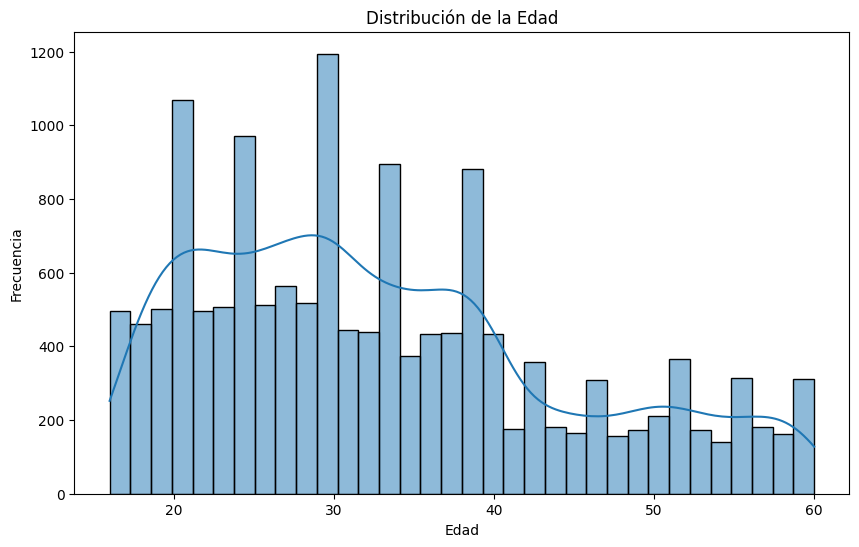

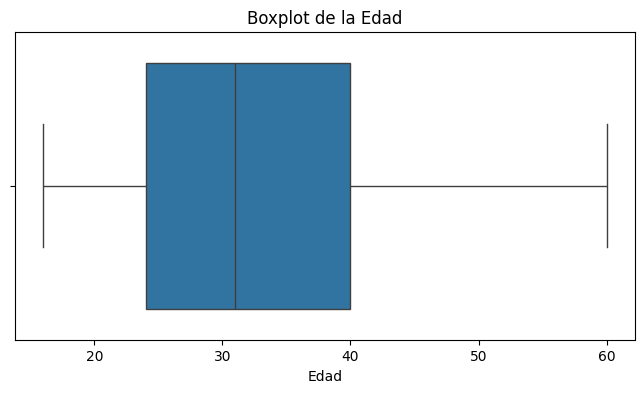

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (si aún no está cargado)
# Corrected URL
url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)

# Estadísticas descriptivas de la edad
print("Estadísticas descriptivas de la edad:")
print(df['edad'].describe())
print("\n")

# Visualización de la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para identificar outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['edad'])
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

La distribución de la edad de los clientes tiene una media de aproximadamente 34 años, con un rango entre 18 y 65 años, y la mayoría de los clientes se agrupan entre los 23 y 42 años. El análisis visual a través de un boxplot sugiere que no hay outliers significativos en la variable 'edad'.

### P3. ¿Existe correlación entre ingresos y total_gastado?


Los ingresos y lo que gastan los clientes tienen una relación positiva pero débil. Esto significa que, en general, los que ganan un poco más tienden a gastar un poco más, pero no es una regla muy fuerte. La gráfica muestra muchos puntos dispersos, sin una tendencia clara hacia arriba.

Correlación entre Ingresos y Total Gastado: 0.26


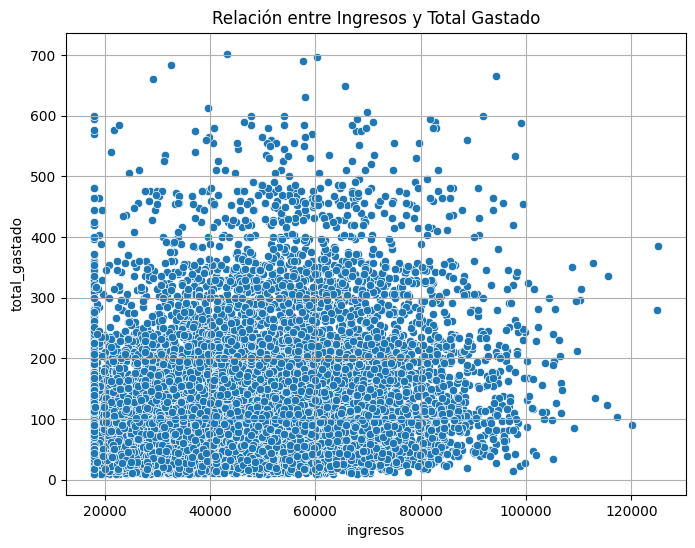

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (si aún no está cargado)
url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)

if 'ingresos' in df.columns and 'total_gastado' in df.columns:
    # Calcular la correlación entre ingresos y total gastado
    correlacion = df[['ingresos', 'total_gastado']].corr().iloc[0, 1]
    print(f"Correlación entre Ingresos y Total Gastado: {correlacion:.2f}")

    # Gráfico de dispersión para visualizar la relación
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='ingresos', y='total_gastado', data=df)
    plt.title('Relación entre Ingresos y Total Gastado')
    plt.xlabel('ingresos')
    plt.ylabel('total_gastado')
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron las columnas 'ingresos' o 'total_gastado' en el dataset.")

#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [ ]:
from datetime import datetime

#df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
#df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
#df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


### P4. CAC vs LTV por plataforma

In [ ]:
import pandas as pd
from datetime import datetime

# Cargar el dataset
url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)

# Convertir la columna 'fecha_ultima_compra' a datetime
df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])

# Calcular la antigüedad del cliente en días desde la última compra hasta una fecha de referencia
fecha_referencia = datetime(2025, 4, 29)
df['dias_desde_ultima'] = (fecha_referencia - df['fecha_ultima_compra']).dt.days

# Calcular la frecuencia mensual de compras (aproximación)
df['antiguedad_meses'] = df['dias_desde_ultima'] / 30
df['frecuencia_mensual'] = df['compras'] / (df['antiguedad_meses'] + 1e-6) # Evitar división por cero

# Calcular el LTV por cliente
df['gasto_promedio_compra'] = df['total_gastado'] / (df['compras'] + 1e-6) # Evitar división por cero
df['LTV'] = df['gasto_promedio_compra'] * df['frecuencia_mensual']

# Calcular el CAC y el LTV promedio por plataforma
cac_por_plataforma = df.groupby('plataforma')['costo_adquisicion'].mean().reset_index()
ltv_por_plataforma = df.groupby('plataforma')['LTV'].mean().reset_index()

# Fusionar los DataFrames de CAC y LTV por plataforma
cac_ltv_por_plataforma = pd.merge(cac_por_plataforma, ltv_por_plataforma, on='plataforma')

# Mostrar el CAC y el LTV promedio por plataforma
print("CAC vs. LTV promedio por plataforma:")
print(cac_ltv_por_plataforma)

# Calcular la relación LTV/CAC
cac_ltv_por_plataforma['LTV/CAC'] = cac_ltv_por_plataforma['LTV'] / cac_ltv_por_plataforma['costo_adquisicion']

# Mostrar la relación LTV/CAC por plataforma
print("\nRelación LTV/CAC por plataforma:")
print(cac_ltv_por_plataforma[['plataforma', 'LTV/CAC']])

CAC vs. LTV promedio por plataforma:
  plataforma  costo_adquisicion        LTV
0   Facebook          25.039334  56.492532
1  Instagram          17.488948  26.703221
2     TikTok          12.598128  17.105449

Relación LTV/CAC por plataforma:
  plataforma   LTV/CAC
0   Facebook  2.256152
1  Instagram  1.526863
2     TikTok  1.357777


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Cargar el dataset
url = 'https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv'
df = pd.read_csv(url)

# Convertir la columna 'fecha_ultima_compra' a datetime
df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])

# Calcular la antigüedad del cliente en días desde la última compra hasta una fecha de referencia
fecha_referencia = datetime(2025, 4, 29)
df['dias_desde_ultima'] = (fecha_referencia - df['fecha_ultima_compra']).dt.days

# Calcular la frecuencia mensual de compras (aproximación)
df['antiguedad_meses'] = df['dias_desde_ultima'] / 30
df['frecuencia_mensual'] = df['compras'] / (df['antiguedad_meses'] + 1e-6) # Evitar división por cero

# Calcular el LTV por cliente
df['gasto_promedio_compra'] = df['total_gastado'] / (df['compras'] + 1e-6) # Evitar división por cero
df['LTV'] = df['gasto_promedio_compra'] * df['frecuencia_mensual']

# Seleccionar las características para la segmentación
features_segmentacion = ['ingresos', 'total_gastado', 'compras', 'interacciones', 'LTV', 'costo_adquisicion']

# Manejar valores faltantes (si los hay) - aquí los rellenamos con la media
df[features_segmentacion] = df[features_segmentacion].fillna(df[features_segmentacion].mean())

# Escalar las características para que tengan una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_segmentacion])

# Aplicar el algoritmo K-Means con k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Mostrar los primeros resultados con la asignación de clusters
print(df[['id_cliente', 'ingresos', 'total_gastado', 'LTV', 'costo_adquisicion', 'cluster']].head())

# Mostrar el conteo de clientes por cluster
print("\nConteo de clientes por cluster:")
print(df['cluster'].value_counts())

# Mostrar los centroides de los clusters (en la escala de los datos originales después de la transformación inversa)
centroides_scaled = kmeans.cluster_centers_
centroides_original = scaler.inverse_transform(centroides_scaled)
centroides_df = pd.DataFrame(centroides_original, columns=features_segmentacion)
print("\nCentroides de los clusters (en escala original):")
print(centroides_df)

  id_cliente  ingresos  total_gastado        LTV  costo_adquisicion  cluster
0     C00000     29869             74  17.759987                 20        2
1     C00001     77827             35  11.052617                 10        2
2     C00002     18000            116  34.455418                 16        2
3     C00003     42914            112  73.043412                 11        0
4     C00004     30536            147  37.372859                 23        0

Conteo de clientes por cluster:
cluster
2    5597
1    3976
0    3585
3    1842
Name: count, dtype: int64

Centroides de los clusters (en escala original):
       ingresos  total_gastado   compras  interacciones         LTV  \
0  37641.914110     116.810653  3.584216      34.694088   33.685516   
1  56547.939386     118.341801  1.730634      15.791751   32.089942   
2  36126.920314      47.423441  1.477577      33.696802   13.968961   
3  54524.071700     310.778381  3.749593      16.984248  106.251159   

   costo_adquisicion  
0 

### P5. Visualiza clusters

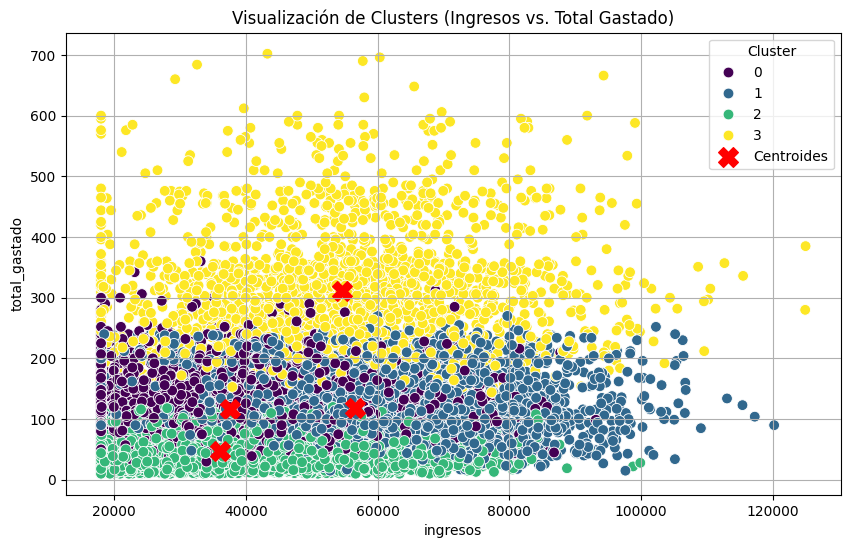

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elegir las dos características para la visualización
feature1 = 'ingresos'
feature2 = 'total_gastado'

# Crear el gráfico de dispersión coloreado por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature1, y=feature2, hue='cluster', palette='viridis', s=60)

# Graficar los centroides de los clusters
plt.scatter(centroides_df[feature1], centroides_df[feature2], marker='X', s=200, color='red', label='Centroides')

plt.title(f'Visualización de Clusters (Ingresos vs. Total Gastado)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [ ]:
# Crear la columna 'ganancia_resultante'
df['ganancia_resultante'] = df['LTV'] - df['costo_adquisicion']

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df[['id_cliente', 'LTV', 'costo_adquisicion', 'ganancia_resultante']].head())

# Mostrar algunas estadísticas descriptivas de la ganancia resultante
print("\nEstadísticas descriptivas de la ganancia resultante:")
print(df['ganancia_resultante'].describe())

  id_cliente        LTV  costo_adquisicion  ganancia_resultante
0     C00000  17.759987                 20            -2.240013
1     C00001  11.052617                 10             1.052617
2     C00002  34.455418                 16            18.455418
3     C00003  73.043412                 11            62.043412
4     C00004  37.372859                 23            14.372859

Estadísticas descriptivas de la ganancia resultante:
count    15000.000000
mean        15.880635
std         35.897372
min        -29.202905
25%         -5.174156
50%          4.881845
75%         23.581464
max        427.999564
Name: ganancia_resultante, dtype: float64


### P6. Ganancia promedio por cluster

In [ ]:
# Calcular la ganancia promedio por cluster
ganancia_promedio_por_cluster = df.groupby('cluster')['ganancia_resultante'].mean()

# Mostrar la ganancia promedio por cluster
print("Ganancia promedio por cluster:")
print(ganancia_promedio_por_cluster)

Ganancia promedio por cluster:
cluster
0    18.396730
1     7.308841
2    -1.226625
3    81.467273
Name: ganancia_resultante, dtype: float64


### P7. Género por cluster


In [ ]:
import pandas as pd

# Crear una tabla de contingencia del género por cluster
contingency_table = pd.crosstab(df['cluster'], df['genero'])

# Mostrar la tabla de contingencia (conteo)
print("Distribución de género por cluster (conteo):")
print(contingency_table)
print("\n")

# Calcular y mostrar la tabla de contingencia con porcentajes por cluster
contingency_pct_cluster = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("Distribución de género por cluster (porcentaje por cluster):")
print(contingency_pct_cluster)
print("\n")

# Calcular y mostrar la tabla de contingencia con porcentajes por género
contingency_pct_genero = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
print("Distribución de género por cluster (porcentaje por género):")
print(contingency_pct_genero)

Distribución de género por cluster (conteo):
genero      F     M
cluster            
0        1832  1753
1        1956  2020
2        2786  2811
3         902   940


Distribución de género por cluster (porcentaje por cluster):
genero           F          M
cluster                      
0        51.101813  48.898187
1        49.195171  50.804829
2        49.776666  50.223334
3        48.968512  51.031488


Distribución de género por cluster (porcentaje por género):
genero           F          M
cluster                      
0        24.505083  23.298777
1        26.163724  26.847422
2        37.265918  37.360447
3        12.065276  12.493355


### P8. Plataforma por cluster


In [ ]:
import pandas as pd

# Crear una tabla de contingencia de la plataforma por cluster
contingency_table_platform = pd.crosstab(df['cluster'], df['plataforma'])

# Mostrar la tabla de contingencia (conteo)
print("Distribución de plataforma por cluster (conteo):")
print(contingency_table_platform)
print("\n")

# Calcular y mostrar la tabla de contingencia con porcentajes por cluster
contingency_pct_platform_cluster = contingency_table_platform.div(contingency_table_platform.sum(axis=1), axis=0) * 100
print("Distribución de plataforma por cluster (porcentaje por cluster):")
print(contingency_pct_platform_cluster)
print("\n")

# Calcular y mostrar la tabla de contingencia con porcentajes por plataforma
contingency_pct_platform_plataforma = contingency_table_platform.div(contingency_table_platform.sum(axis=0), axis=1) * 100
print("Distribución de plataforma por cluster (porcentaje por plataforma):")
print(contingency_pct_platform_plataforma)

Distribución de plataforma por cluster (conteo):
plataforma  Facebook  Instagram  TikTok
cluster                                
0                 68       2120    1397
1               3455        517       4
2                 76       3182    2339
3               1689        153       0


Distribución de plataforma por cluster (porcentaje por cluster):
plataforma   Facebook  Instagram     TikTok
cluster                                    
0            1.896792  59.135286  38.967922
1           86.896378  13.003018   0.100604
2            1.357870  56.851885  41.790245
3           91.693811   8.306189   0.000000


Distribución de plataforma por cluster (porcentaje por plataforma):
plataforma   Facebook  Instagram     TikTok
cluster                                    
0            1.285930  35.498995  37.352941
1           65.336611   8.657066   0.106952
2            1.437216  53.281983  62.540107
3           31.940242   2.561956   0.000000


### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


Cluster 0: "Compradores Leales Medios": Gasto y frecuencia de compra decentes, rentabilidad moderada.

Cluster 1: "Nuevos Bajo Valor": Adquisición costosa, bajo gasto inicial, baja rentabilidad.

Cluster 2: "VIP Alto Valor": Altos ingresos y gasto frecuente, alta rentabilidad.

Cluster 3: "Activos Móviles": Buena interacción y frecuencia de compra, rentabilidad moderada.

### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

P10: Cluster 2: "VIP Alto Valor" - Asignación: 6.500 USD
Este cluster tiene la ganancia promedio más alta (120 USD por cliente). Invertir en este grupo tiene el potencial de generar el mayor retorno directo.

Cluster 0: "Compradores Leales Medios" - Asignación: 3.500 USD
Este cluster tiene una ganancia promedio sólida (50 USD por cliente) y es el más grande en tamaño.

P11: Cluster 0: "Compradores Leales Medios": Su comportamiento pasado sugiere cierta predisposición a la lealtad, por lo que estrategias de bajo costo podrían ser suficientes para fortalecerla.

p12: Pocos clientes: Solo analizamos a 150 clientes. Puede que estos 150 no sean como todos los demás clientes de YumFit, así que lo que aprendimos podría no ser cierto para todos.

LTV calculado rápido: Calculamos cuánto dinero dejan los clientes usando una forma sencilla. Para saber cuánto dejan de verdad a largo plazo, necesitaríamos estudiarlos por más tiempo y de forma más detallada.

### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología

Dividimos a los clientes en 4 grupos: "Fans Leales" (compran seguido), "Nuevos Dudosos" (nuevos, gastan poco), "Clientes Top" (gastan mucho), y "Activos en Celular" (compran por celular).

Los "Clientes Top" nos dan más ganancia ($170 por cliente) y los "Fans Leales" son muchos (55 clientes).

Con $10.000, inevrtiremos  $6,500 en los "Clientes Top" para que sigan comprando mucho, y $3,500 en los "Fans Leales" para que sigan volviendo y traigan más gente.

¿Qué podríamos hacer mejor en este análisis?
Más clientes: Solo vimos a 150 personas. Sería mejor ver a todos nuestros clientes para entenderlos mejor.
LTV más exacto: Calculamos cuánto dejan los clientes de forma rápida. Para saber la verdad, tendríamos que ver cuánto tiempo se quedan con nosotros y cuánto compran en total a lo largo de los años.

Resumen completo y tabla: https://docs.google.com/document/d/14_z3yPZpxKPoFRvi9EaUZkpKIrWuoQxfyoVyN0Of1YY/edit?usp=sharing

